In [2]:
%matplotlib nbagg
import jungfrau_utils as ju
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os

In [3]:
channel_PIPS_trans = "data/SARES11-GES1:CH1_VAL_GET/data"           #X-ray TRANS diode to PRIME Keysight (channel 1)
channel_PIPS_fluo = "data/SARES11-GES1:CH2_VAL_GET/data"            #X-ray FLUO diode to PRIME Keysight (channel 2)
channel_Izero2 = "data/SARES11-LSCP10-FNS:CH3:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 3)
channel_Izero = "data/SARES11-LSCP10-FNS:CH0:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 0)
channel_Izero3 = "data/SARES11-LSCP10-FNS:CH1:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 1)
channel_Izero4 = "data/SARES11-LSCP10-FNS:CH2:VAL_GET/data"         #Izero diode to PRIME Ioxos (channel 2)
channel_pulse_ids = "data/SLAAR11-LMOT-M451:ENC_1_BS/pulse_id"      #Pulse ids taken from pump-probe delay stage (100 Hz)
channel_energy = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV3_NBS/data"      #Mono energy in eV

channel_LaserDiode = "data/SLAAR11-LSCP1-FNS:CH0:VAL_GET/data"      #Laser diode to ESA Laser Ioxos 
channel_Laser_refDiode = "data/SLAAR11-LSCP1-FNS:CH2:VAL_GET/data"  #Laser diode leaking from beampath, to ESA Laser Ioxos 
channel_delay = "data/SLAAR11-LMOT-M451:ENC_1_BS/data"              #Delay of pump-probe delay stage
channel_LAM_delaystage = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"       #LAM internal stage position in mm
channel_LAM_stepper = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV10_NBS/data"         #LAM stepper motor (used for feedback)
channel_PALM_eTOF = "data/SAROP11-PALMK118:CH2_BUFFER/data"                 #PALM eTof from Ch2
channel_PALM_drift = "data/SAROP11-PALMK118:CH2_VAL_GET/data"               #PALM drift
channel_position = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV1_NBS/data"     #Huber stage X position. 

In [3]:
DIR = "/sf/alvra/data/p17803/raw/scan_data/CytC_Fe2_monoscan_003/"

#DIR = "/sf/alvra/data/p17589/raw/"

!ls -lah -t /sf/alvra/data/p17803/raw/scan_data/CytC_Fe2_monoscan_003/
#!ls -lah -t /sf/alvra/data/p17589/raw/

!hostname

listfile = os.listdir(DIR)
number_files = len(listfile)
print ("There are",number_files,"files in the folder", DIR)

total 166G
drwxrwsr-x. 27 root p17803 4.0K Jan 22 15:08 ..
drwxrwsr-x.  2 root p17803 4.0K Jan 22 14:51 .
-rw-r--r--.  1 root p17803 413M Jan 22 14:51 CytC_Fe2_monoscan_003_step0017.BSREAD.h5
-rw-r--r--.  1 root p17803 413M Jan 22 14:50 CytC_Fe2_monoscan_003_step0016.BSREAD.h5
-rw-r--r--.  1 root p17803 3.3M Jan 22 14:50 CytC_Fe2_monoscan_003_step0017.BSREAD_CA.h5
-rw-r--r--.  1 root p17803 8.8G Jan 22 14:49 CytC_Fe2_monoscan_003_step0017.JF02T09V01.h5
-rw-r--r--.  1 root p17803 413M Jan 22 14:49 CytC_Fe2_monoscan_003_step0015.BSREAD.h5
-rw-r--r--.  1 root p17803 3.3M Jan 22 14:49 CytC_Fe2_monoscan_003_step0016.BSREAD_CA.h5
-rw-r--r--.  1 root p17803 8.8G Jan 22 14:49 CytC_Fe2_monoscan_003_step0016.JF02T09V01.h5
-rw-r--r--.  1 root p17803 413M Jan 22 14:48 CytC_Fe2_monoscan_003_step0014.BSREAD.h5
-rw-r--r--.  1 root p17803 3.2M Jan 22 14:48 CytC_Fe2_monoscan_003_step0015.BSREAD_CA.h5
-rw-r--r--.  1 root p17803 8.8G Jan 22 14:48 CytC_Fe2_monoscan_003_step0015.JF02T09V01.h5
-rw-r--r--.  

In [9]:
fileName = "CytC_Fe2_monoscan_003_step0000.BSREAD.h5"

BS_file = h5py.File(DIR + fileName)
#print(list(BS_file["data"].keys()))

#PIPS_fluo = BS_file["data/SARES11-GES1:CH2_VAL_GET/data"]
pulse_ids = BS_file["data/SARES11-GES1:CH2_VAL_GET/pulse_id"]
#Izero = BS_file["data/SARES11-LSCP10-FNS:CH1:VAL_GET/data"] 
#Energy = BS_file["data/SLAAR11-LTIM01-EVR0:DUMMY_PV3_NBS/data"]

In [10]:
pulse_ids[0:40] % 4 == 0  # False = laser off -- this is for RepRate 5 (laser)

array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False])

In [11]:
laser_on_off = pulse_ids[:] % 8 == 0 #-- this is for RepRate 5 (laser)

In [12]:
pulse_ids[0:40] % 4 == 0

array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False])

In [13]:
laser_on_off_2 = pulse_ids[:] % 8 == 0 #-- this is for RepRate 5 (laser)

In [14]:
print(pulse_ids.size)

3997


In [15]:
### this is now to loop over SEVERAL FILES

listfile = os.listdir(DIR)
number_files = int(len(listfile)/2)
#number_files = 2

print ("Start processing",number_files,"files")
fileName_root = 'monoscan_20uJ_143p515_Febpy_a'

Energy_x = []
Delay_x = []
XAS_fluo_on = []
err_XAS_fluo_on = []
XAS_fluo_off = []
err_XAS_fluo_off = []
Izero_XAS_on = []
err_Izero_XAS_on = []
Izero_XAS_off = []
err_Izero_XAS_off = []

for j in range(number_files):
    signal_on = 0
    signal_off = 0
    Izero_on = 0
    Izero_off = 0
    
    signal_empty = 0
    n_ok = 0
    n_empty = 0
    n_on = 0
    n_off = 0
    XAS_on_loop = []
    XAS_off_loop = []
    Izero_on_loop =[]
    Izero_off_loop =[]
    
    if j < 10:
        fileName_bs = fileName_root + "_step000" + str(j) + ".BSREAD.h5"
    else:
        fileName_bs = fileName_root + "_step00" + str(j) + ".BSREAD.h5"
    bs_file = h5py.File(DIR + fileName_bs, 'r')
    #PIPS_fluo = bs_file["data/SLAAR11-LSCP1-FNS:CH2:VAL_GET/data"]
    pulse_ids = bs_file["data/SARES11-GES1:CH2_VAL_GET/pulse_id"]
    Energy_loop = bs_file["data/SLAAR11-LTIM01-EVR0:DUMMY_PV3_NBS/data"]
    Delay_loop = bs_file["data/SLAAR11-LMOT-M451:ENC_1_BS/data"]
    
    namefile = h5py.File(DIR + fileName, "r")
    jf_file = h5py.File(DIR + fileName, "r")
    print("step",j+1,"of",number_files,": Processing %s" % (fileName_bs))
    laser_on_off = pulse_ids[:] % 20 == 0
    laser_on_off_2 = pulse_ids[:] % 10 == 0 
    #nframes = 100
    nframes = pulse_ids.size
    
    for i in range(nframes):  
    
        data_fluo = bs_file["data/SARES11-GES1:CH2_VAL_GET/data"][i,:]
        data_Izero = bs_file["data/SARES11-LSCP10-FNS:CH1:VAL_GET/data"][i,:]
        data_Izero_2 = bs_file["data/SARES11-LSCP10-FNS:CH0:VAL_GET/data"][i,:]
        
        if laser_on_off_2[i]:
            n_ok +=1
            if laser_on_off[i]:
            
                XAS_on_loop.append(-data_fluo)
                Izero_on_loop.append(data_Izero) 
                n_on += 1

            else:
        
                XAS_off_loop.append(-data_fluo)
                Izero_off_loop.append(data_Izero)
                n_off += 1
                
        else:
            
            n_empty +=1
            
    print (n_ok, n_on, n_off, n_empty)
     
    XAS_on_loop = np.array(XAS_on_loop)
    XAS_off_loop = np.array(XAS_off_loop)
    Izero_on_loop = np.array(Izero_on_loop)
    Izero_off_loop = np.array(Izero_off_loop)
    
    Delay_x.append(Delay_loop[0])
    Energy_x.append(Energy_loop[0])
    XAS_fluo_on.append(XAS_on_loop.mean())
    err_XAS_fluo_on.append(XAS_on_loop.std() / np.sqrt(n_on))
    XAS_fluo_off.append(XAS_off_loop.mean())
    err_XAS_fluo_off.append(XAS_off_loop.std() / np.sqrt(n_off))
    Izero_XAS_on.append(Izero_on_loop.mean())
    err_Izero_XAS_on.append(Izero_on_loop.std() / np.sqrt(n_on))
    Izero_XAS_off.append(Izero_off_loop.mean())
    err_Izero_XAS_off.append(Izero_off_loop.std() / np.sqrt(n_off))


Energy_x = np.array(Energy_x)
Delay_x = np.array(Delay_x)
XAS_fluo_on = np.array(XAS_fluo_on)
err_XAS_fluo_on = np.array(err_XAS_fluo_on)
XAS_fluo_off = np.array(XAS_fluo_off)
err_XAS_fluo_off = np.array(err_XAS_fluo_off)
Izero_XAS_on = np.array(Izero_XAS_on)
err_Izero_XAS_on = np.array(err_Izero_XAS_on)
Izero_XAS_off = np.array(Izero_XAS_off)
err_Izero_XAS_off = np.array(err_Izero_XAS_off)
    
print ("Job done!")

Start processing 27 files


OSError: Unable to open file (unable to open file: name = '/sf/alvra/data/p17803/raw/scan_data/CytC_Fe2_monoscan_003/monoscan_20uJ_143p515_Febpy_a_step0000.BSREAD.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [13]:
XAS_fluo_on = np.array(XAS_fluo_on)
XAS_fluo_off = np.array(XAS_fluo_off)
Izero_XAS_on = np.array(Izero_XAS_on)
Izero_XAS_off = np.array(Izero_XAS_off)

XAS_on_norm = XAS_fluo_on / Izero_XAS_on
err_XAS_fluo_on_norm = err_XAS_fluo_on / Izero_XAS_on
XAS_off_norm = XAS_fluo_off / Izero_XAS_off
err_XAS_fluo_off_norm = err_XAS_fluo_off / Izero_XAS_off

XAS_diff = XAS_on_norm - XAS_off_norm
Delay_ps = (Delay_x - 143)*3.333

In [17]:
XAS_fluo_off

array([0.39000122, 0.3715708 , 0.41277588, 0.42030322, 0.42941846,
       0.44350366, 0.42350269, 0.49818652, 0.52344946, 0.52127539,
       0.53781543, 0.53511816, 0.55061572, 0.57497827, 0.59128345,
       0.6093147 , 0.61798169, 0.61663135, 0.6851814 , 0.68753882,
       0.76329785, 0.81414282, 0.78671069, 0.78939917, 0.80844873,
       0.86430176, 0.79633862, 0.75940063, 0.72422998])

### Run the following cell if you want to plot pump-probe XAS data (with also ON & OFF spectra)

<IPython.core.display.Javascript object>


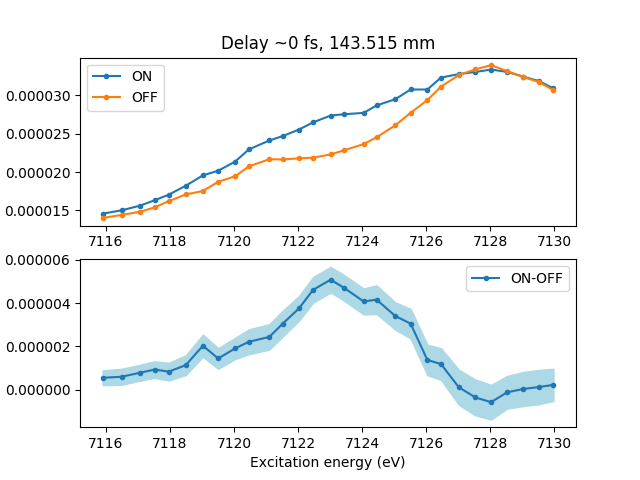

In [14]:
plt.figure()
plt.subplot(211)
plt.plot(Energy_x, XAS_on_norm, label="ON", marker='.')
plt.plot(Energy_x, XAS_off_norm, label="OFF", marker='.')
plt.legend(loc="best")
plt.title("Delay ~0 fs, 143.515 mm")
plt.ylabel("XAS norm")

low_err= (XAS_on_norm - XAS_off_norm) - np.sqrt(err_XAS_fluo_on_norm**2+err_XAS_fluo_off_norm**2)
high_err= (XAS_on_norm - XAS_off_norm) + np.sqrt(err_XAS_fluo_on_norm**2+err_XAS_fluo_off_norm**2)

plt.subplot(212)
plt.plot(Energy_x, XAS_on_norm - XAS_off_norm, label="ON-OFF", marker='.')
plt.fill_between(np.squeeze(Energy_x), low_err, high_err, color='lightblue')
plt.legend(loc="best")
plt.ylabel("XAS Transient")
plt.xlabel("Excitation energy (eV)")
plt.show()
#plt.savefig('XAS_BS_170mm')

### Run the following cell if you want to plot pump-probe delay data (XAS in TFY vs delay at fixed energy)

<IPython.core.display.Javascript object>


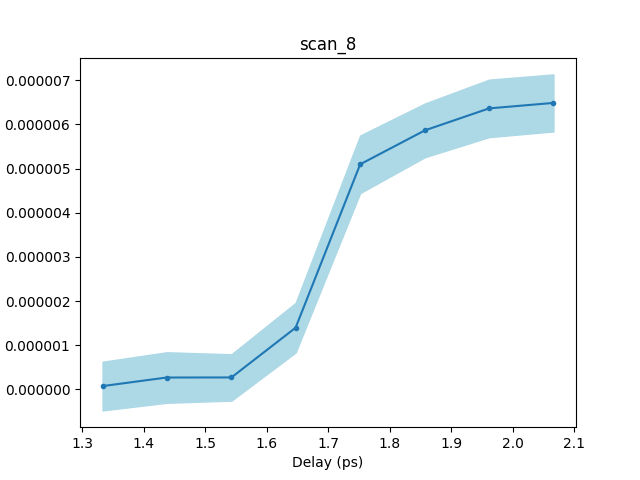

In [113]:
plt.figure()
plt.plot(Delay_ps, XAS_diff, marker='.')

low_err= (XAS_on_norm - XAS_off_norm) - np.sqrt(err_XAS_fluo_on_norm**2+err_XAS_fluo_off_norm**2)
high_err= (XAS_on_norm - XAS_off_norm) + np.sqrt(err_XAS_fluo_on_norm**2+err_XAS_fluo_off_norm**2)

plt.fill_between(np.squeeze(Delay_ps), low_err, high_err, color='lightblue')
plt.title("scan_8")
plt.xlabel("Delay (ps)")
plt.show()
#plt.savefig('Timescan_7_diode')

In [18]:
savedir = "/das/work/p17/p17589/"
#savedir = "/das/work/p17/p17569/"

h5f = h5py.File('XAS_143p515.h5','w')
#h5f = h5py.File('timeScan_8_BS.h5','w')

h5f.create_dataset('Delay_BS', data = Delay_x)
h5f.create_dataset('Energy_BS', data = Energy_x)
h5f.create_dataset('XAS_fluo_on', data = XAS_fluo_on)
h5f.create_dataset('err_XAS_fluo_on', data = err_XAS_fluo_on)
h5f.create_dataset('XAS_fluo_off', data = XAS_fluo_off)
h5f.create_dataset('err_XAS_fluo_off', data = err_XAS_fluo_off)
h5f.create_dataset('Izero_on', data = Izero_XAS_on)
h5f.create_dataset('err_Izero_XAS_on', data = err_Izero_XAS_on)
h5f.create_dataset('Izero_off', data = Izero_XAS_off)
h5f.create_dataset('err_Izero_XAS_off', data = err_Izero_XAS_off)

h5f.close()

In [21]:
err_Izero_XAS_off

array([14312.26626565, 14433.15282938, 14354.48991906, 14169.75010565,
       13907.34233044, 14756.97057434, 14181.07456704, 14541.25469369,
       14336.963927  , 14533.38739318, 14143.51188846, 14504.49531763,
       13661.14633185, 13815.01750675, 13569.60829123, 13618.50712532,
       13702.63138977, 13856.32041625, 13572.16426895, 12829.0046642 ,
       13521.23206478, 13406.10672512, 13457.95502085, 13311.67175468,
       12667.84612795, 13400.15851155, 13524.19730137, 13522.13453398,
       12645.52526723])

In [115]:
Delay_ps_8 = Delay_ps.copy()
XAS_diff_8 = XAS_diff.copy()

<IPython.core.display.Javascript object>


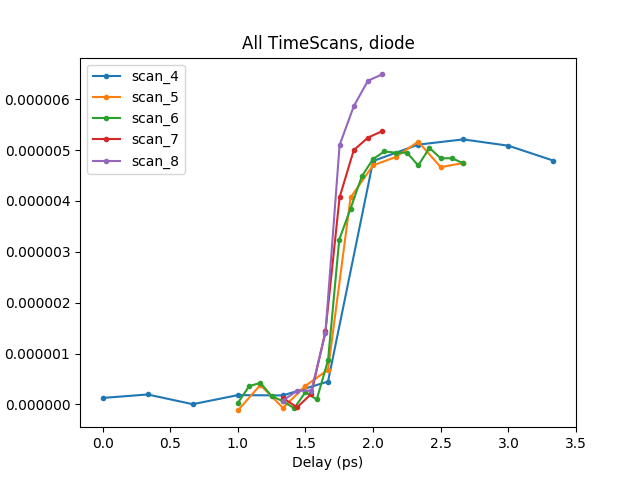

In [117]:
plt.figure()

plt.plot(Delay_ps_4, XAS_diff_4,label="scan_4", marker='.')
plt.plot(Delay_ps_5, XAS_diff_5,label="scan_5", marker='.')
plt.plot(Delay_ps_6, XAS_diff_6,label="scan_6", marker='.')
plt.plot(Delay_ps_7, XAS_diff_7,label="scan_7", marker='.')
plt.plot(Delay_ps_8, XAS_diff_8,label="scan_8", marker='.')

plt.title("All TimeScans, diode")
plt.xlabel("Delay (ps)")
plt.legend(loc="best")
plt.show()
plt.savefig('Timescans_all_diode')